In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv('heart_attack.csv')
df.head()

,heart_disease,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [2]:
X=df[['restecg', 'thalach', 'exang']]
Y=df['heart_disease']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [3]:
import random 
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b, theta
b,theta = initialize(3)
print("Bias: ",b,"Weights: ", theta)

Bias:  0.511785862668437 Weights:  [0.04019903 0.91204533 0.97036775]


In [4]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([-0.10638902,  0.28955797,  1.12441621,  1.2837426 ,  0.76822437,
        0.92594622,  0.29116252,  2.39528237, -0.22565448,  2.15805022])

In [5]:
import math
def get_cost(Y,Y_hat):
    Y_resd = Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

2.292828591730863

In [6]:
def update_theta(x,y,y_hat,b_0,theta_0,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_0-learning_rate*dw
    return b_1, theta_1
print("After initialization -Bias: ",b, "theta: ", theta)
Y_hat=predict_Y(b,theta,X)
b, theta = update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ", b, "theta: ", theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.511785862668437 theta:  [0.04019903 0.91204533 0.97036775]
After first update -Bias:  0.5015501454150681 theta:  [0.04244401 0.89291041 0.96634647]


2.292828591730863

In [7]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b, theta, X)
        this_cost = get_cost(Y, Y_hat)
        prev_b = b
        prev_theta = theta
        b, theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)
        iter_num += 1
        if(iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1
            
    print ("Final Estimate of b and theta: ", b, theta)
    return gd_iterations_df, b, theta

gd_iterations_df, b, theta = run_gradient_descent(X, Y, alpha = 0.001, num_iterations = 200)


Final Estimate of b and theta:  0.43525089157215735 [0.38017023 0.10658775 0.55480279]


In [8]:
gd_iterations_df[0:10]

,iteration,cost
0,10.0,1.517558
1,20.0,1.489790
2,30.0,1.463030
3,40.0,1.437240
4,50.0,1.412386
5,60.0,1.388432
6,70.0,1.365344
7,80.0,1.343090
8,90.0,1.321640
9,100.0,1.300963


Text(0, 0.5, 'Cost or MSE')

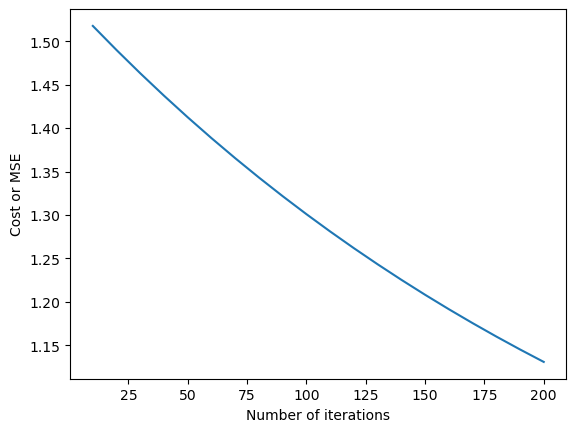

In [9]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

Final Estimate of b and theta:  1.238181098637111e-16 [ 0.12034532 -0.301491    0.295619  ]
Final Estimate of b and theta:  0.00726269454447825 [ 0.12613194 -0.26087267  0.33054767]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

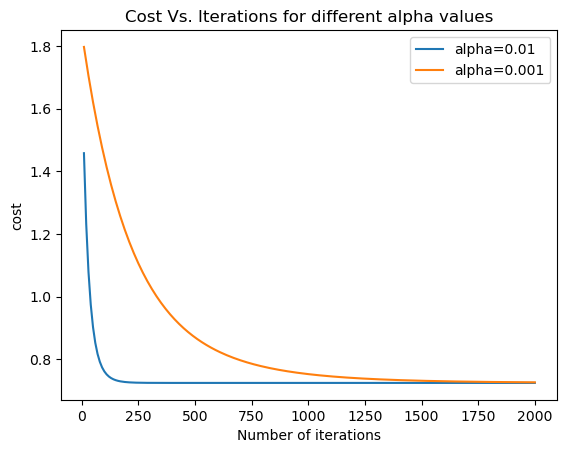

In [10]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)

alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)

plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')